# Lab 9

## TODO:

- [x] Linear classifier
  - [x] Use training data, note MSE
  - [x] Can we say the data is linearly separable?
  - [x] Note MSE on test data
  - [x] Does the model generalise?
- [x] Logistic regression
  - [x] Use training data, note MSE
  - [x] Note MSE on test data
  - [x] Record and explain findings
- [x] (optional) Experiment with hyperparameters (maybe use random search)
  - [x] learning rate
  - [x] epochs
  - [-] batch size
- [x] (optional) Table or graph results

## Imports 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler

## Data setup

In [24]:
np.random.seed(0)
os.environ["OMP_NUM_THREADS"] = "5"

df3 = pd.read_csv("Data/data3.csv")
df3

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet,G3
0,0,1,2,4,4,1,18,0,0,0,0,6
1,0,1,2,1,1,1,17,0,0,0,1,6
2,3,1,2,1,1,2,15,0,0,0,1,10
3,0,1,3,4,2,1,15,0,0,0,1,15
4,0,1,2,3,3,1,16,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,3,2,3,1,19,0,1,1,1,10
1040,0,1,2,3,1,1,18,0,1,0,1,16
1041,0,1,2,1,1,1,18,0,1,0,0,9
1042,0,1,1,3,1,3,17,0,1,0,1,10


In [25]:
X = df3.copy()
y = X.pop("G3") # y becomes the G3 column and deletes it from df3_copy
y_binary = [0 if y_i > np.mean(y) else 1 for y_i in y] #making the target class into binary (over/under average score)

# display(X)
# print(y_binary)
X

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet
0,0,1,2,4,4,1,18,0,0,0,0
1,0,1,2,1,1,1,17,0,0,0,1
2,3,1,2,1,1,2,15,0,0,0,1
3,0,1,3,4,2,1,15,0,0,0,1
4,0,1,2,3,3,1,16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,3,2,3,1,19,0,1,1,1
1040,0,1,2,3,1,1,18,0,1,0,1
1041,0,1,2,1,1,1,18,0,1,0,0
1042,0,1,1,3,1,3,17,0,1,0,1


In [26]:
#scale
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=42,)
X_train.shape

(835, 11)

## Linear Classifier

In [28]:
#batch size is not supported in SGDClassifier, can be done using partial_fit
parameters = {
    "alpha": [1.0, 0.1, 0.01, 0.001],
    "max_iter": [2, 5, 10, 100],
    "penalty" : ["l1", "l2", "none"]

}
linear_model = SGDClassifier(loss="squared_error")
linear_cv = GridSearchCV(linear_model, parameters, cv=10)
linear_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(loss='squared_error'),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'max_iter': [2, 5, 10, 100],
                         'penalty': ['l1', 'l2', 'none']})

In [29]:
print(f"Train accuracy: {linear_cv.best_estimator_.score(X_train, y_train)}")
print(f"Test accuracy: {linear_cv.best_estimator_.score(X_test, y_test)}")

Train accuracy: 0.6646706586826348
Test accuracy: 0.6746411483253588


,alpha,max_iter,penalty,classifier,test_method,accuracy
10,1.000,100,l2,SGDClassifier,10CV,0.649139
4,1.000,5,l2,SGDClassifier,10CV,0.646730
7,1.000,10,l2,SGDClassifier,10CV,0.639644
46,0.001,100,l2,SGDClassifier,10CV,0.639501
47,0.001,100,none,SGDClassifier,10CV,0.634653
1,1.000,2,l2,SGDClassifier,10CV,0.633635
5,1.000,5,none,SGDClassifier,10CV,0.628744
2,1.000,2,none,SGDClassifier,10CV,0.623853
45,0.001,100,l1,SGDClassifier,10CV,0.616968
8,1.000,10,none,SGDClassifier,10CV,0.605967


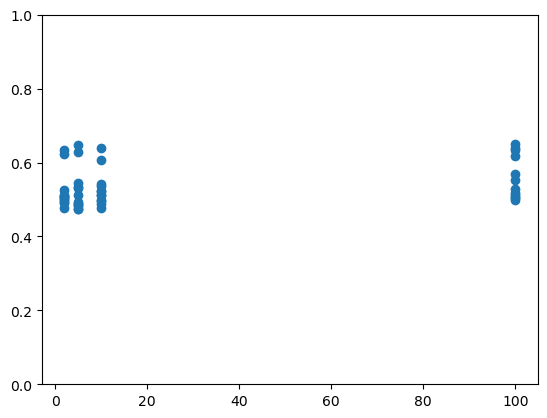

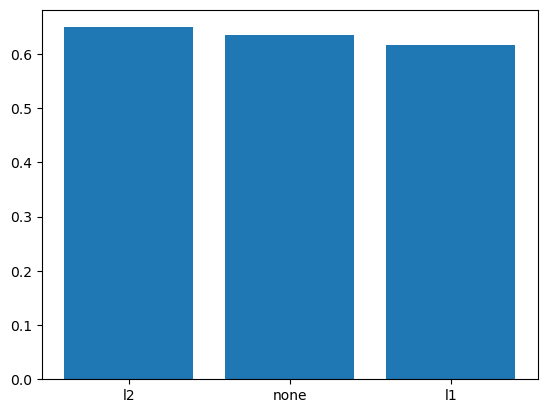

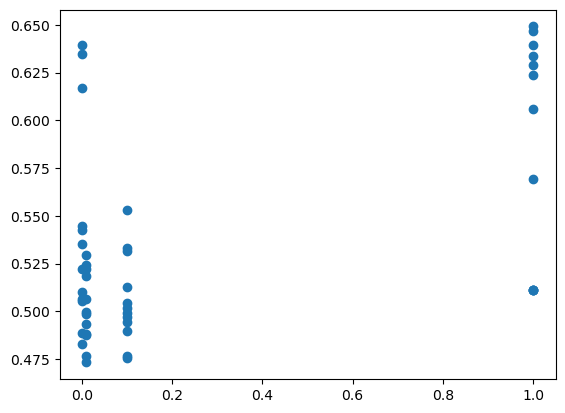

In [30]:
table = pd.DataFrame(linear_cv.cv_results_["params"])
table["classifier"] = "SGDClassifier"
table["test_method"] = "10CV"
table["accuracy"] = linear_cv.cv_results_["mean_test_score"]
table = table.sort_values(by=["accuracy"], ascending=False)

display(table)

plt.ylim(0,1)
plt.scatter(table["max_iter"], table["accuracy"])
plt.show()
plt.bar(table["penalty"], table["accuracy"])
plt.show()
plt.scatter(table["alpha"], table["accuracy"])
plt.show()

## Logistic Regression

In [31]:
#batch size is not supported in SGDClassifier, can be done using partial_fit
parameters = {
    "max_iter": [2, 5, 10, 100],
    "penalty" : ["l1", "l2", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

log_regression = LogisticRegression()
logistic_cv = GridSearchCV(log_regression, parameters, cv=10)
logistic_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [2, 5, 10, 100],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [32]:
print(f"Train accuracy: {logistic_cv.best_estimator_.score(X_train, y_train)}")
print(f"Test accuracy: {logistic_cv.best_estimator_.score(X_test, y_test)}")

Train accuracy: 0.6874251497005988
Test accuracy: 0.69377990430622


,max_iter,penalty,solver,classifier,test_method,accuracy
38,10,l2,sag,LogisticRegression,10CV,0.677897
39,10,l2,saga,LogisticRegression,10CV,0.677883
20,5,l2,newton-cg,LogisticRegression,10CV,0.675502
54,100,l2,saga,LogisticRegression,10CV,0.674312
35,10,l2,newton-cg,LogisticRegression,10CV,0.674312
51,100,l2,lbfgs,LogisticRegression,10CV,0.674312
50,100,l2,newton-cg,LogisticRegression,10CV,0.674312
53,100,l2,sag,LogisticRegression,10CV,0.674312
44,10,none,saga,LogisticRegression,10CV,0.674283
36,10,l2,lbfgs,LogisticRegression,10CV,0.674254


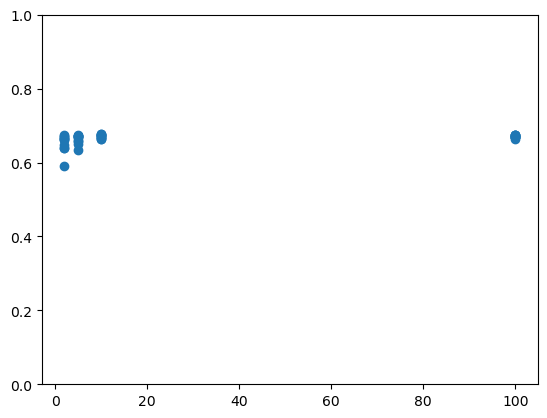

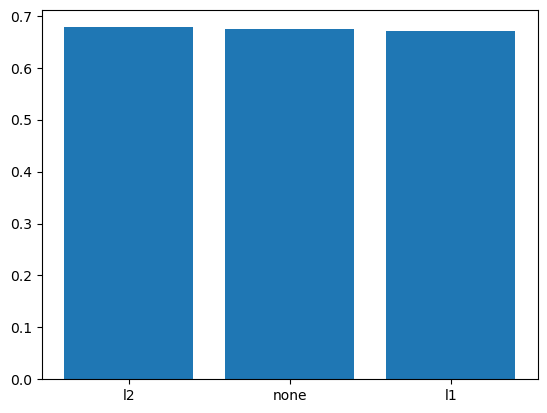

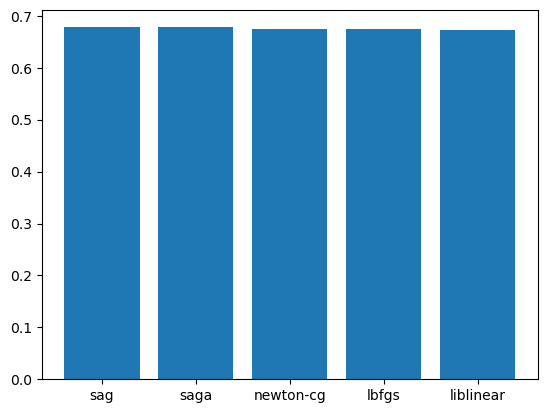

In [33]:
table = pd.DataFrame(logistic_cv.cv_results_["params"])
table["classifier"] = "LogisticRegression"
table["test_method"] = "10CV"
table["accuracy"] = logistic_cv.cv_results_["mean_test_score"]
table = table.sort_values(by=["accuracy"], ascending=False)

display(table)

plt.ylim(0,1)
plt.scatter(table["max_iter"], table["accuracy"])
plt.show()
plt.bar(table["penalty"], table["accuracy"])
plt.show()
plt.bar(table["solver"], table["accuracy"])
plt.show()

In [ ]:
def plot_pen(table):
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(['l1', 'l2', 'none'], 1):
        plt.subplot(1, 3, i)
        plt.scatter(table[table['penalty'] == col]['max_iter'], table[table['penalty'] == col]['accuracy'])
        plt.ylim(0, table['accuracy'].max()+0.25)
        plt.title(col)
        plt.tight_layout()
    plt.show()


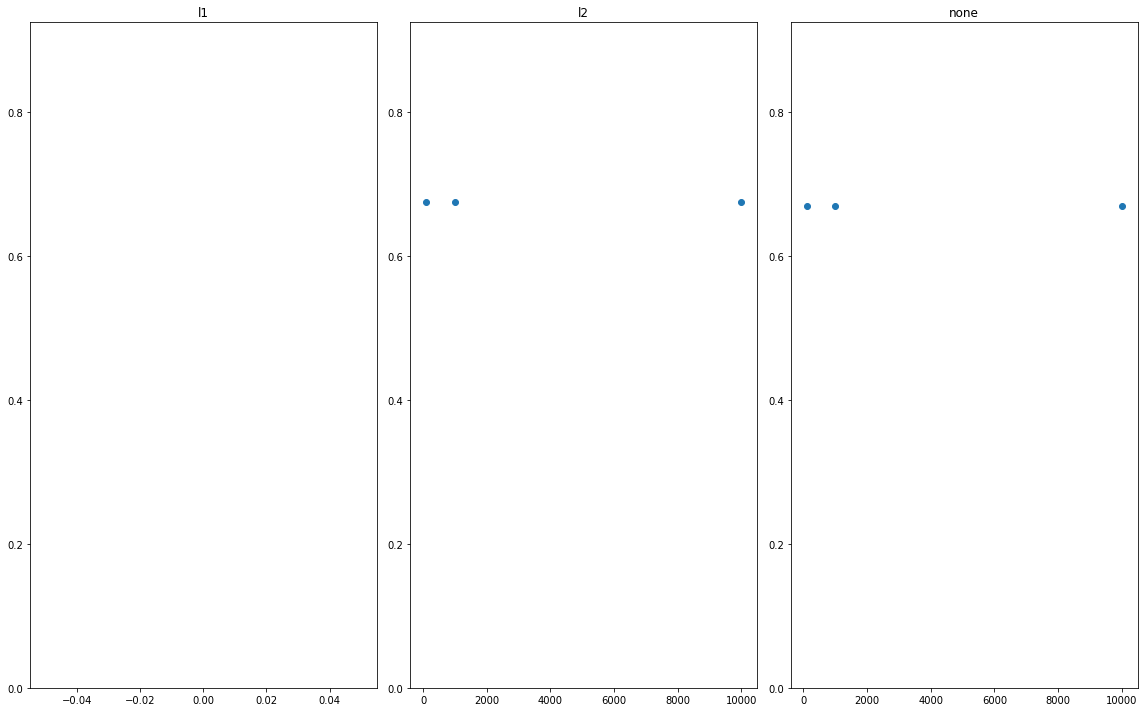

In [48]:
newton_table = table[table['solver'] == 'newton-cg'].sort_values(by=['max_iter'])
plot_pen(newton_table)

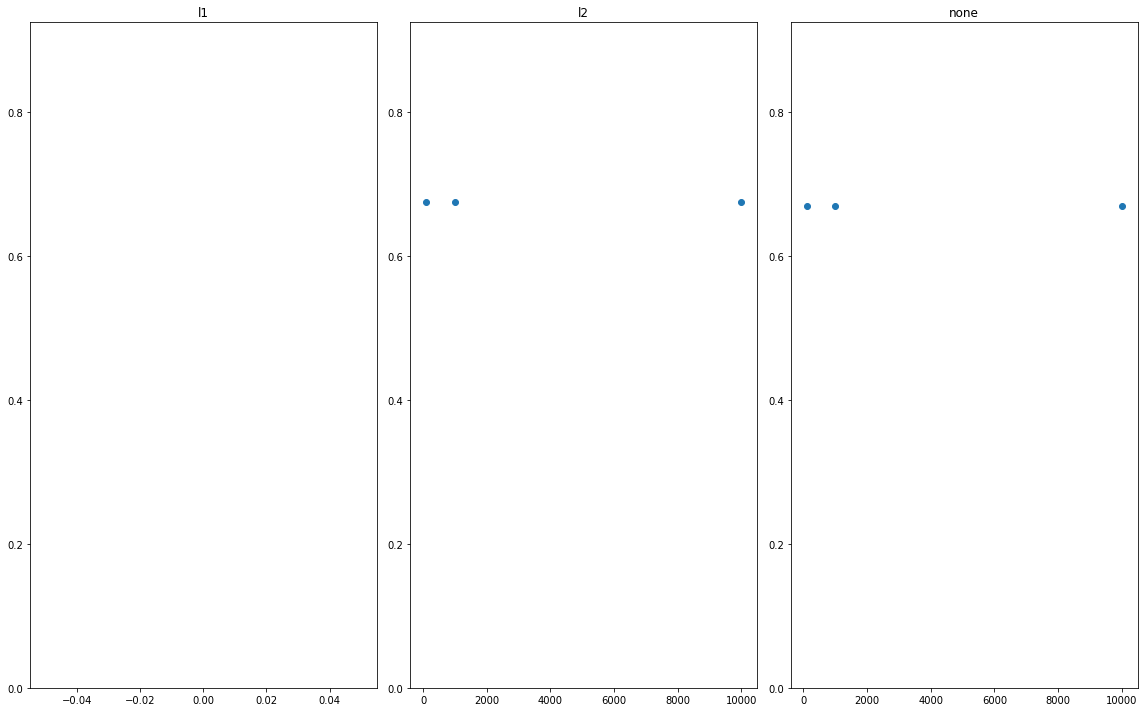

In [49]:
lbfgs_table = table[table['solver'] == 'lbfgs'].sort_values(by=['max_iter'])
plot_pen(lbfgs_table)

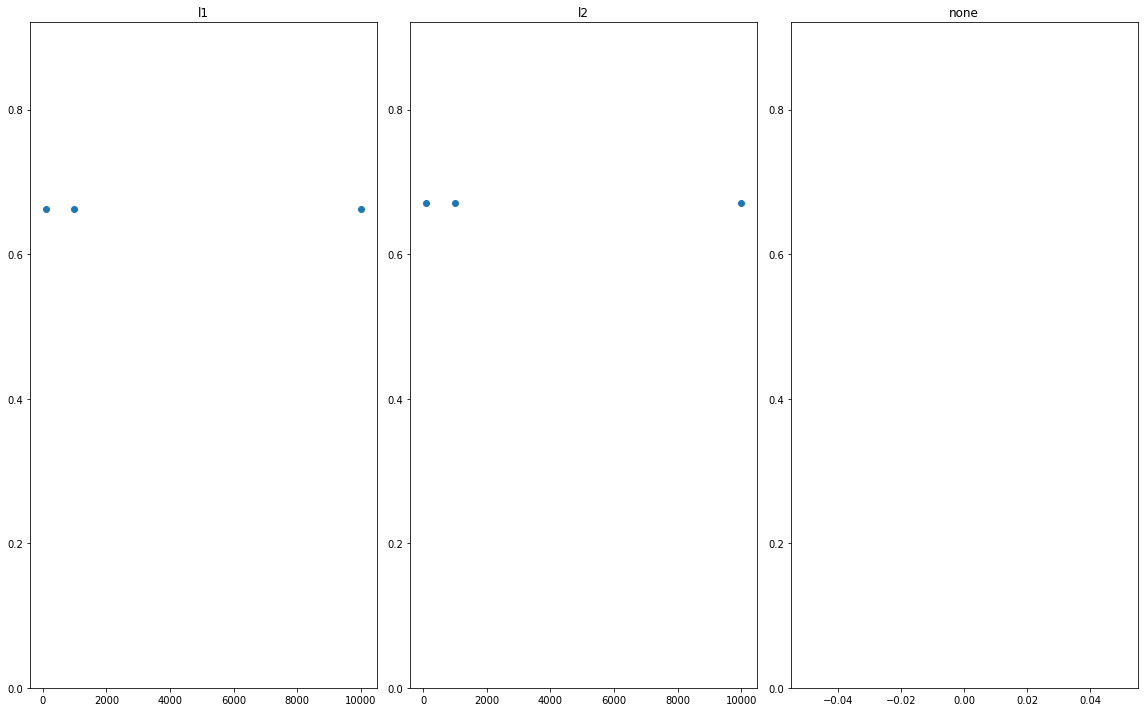

In [50]:
liblinear_table = table[table['solver'] == 'liblinear'].sort_values(by=['max_iter'])
plot_pen(liblinear_table)

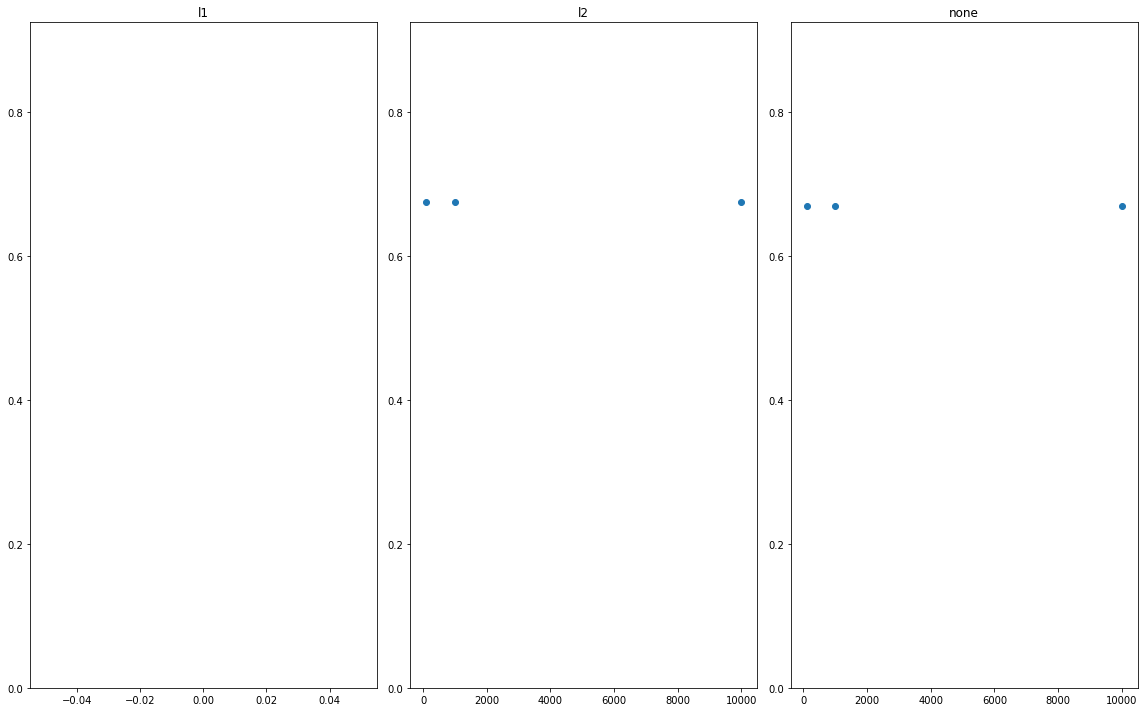

In [51]:
sag_table = table[table['solver'] == 'sag'].sort_values(by=['max_iter'])
plot_pen(sag_table)

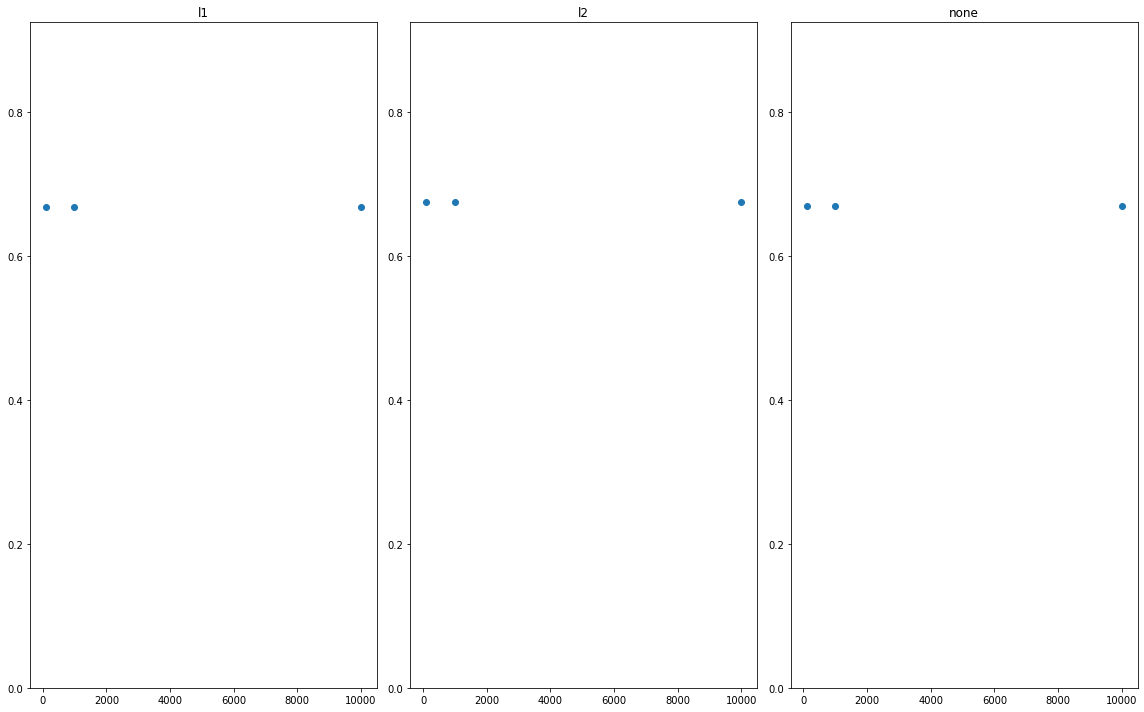

In [52]:
saga_table = table[table['solver'] == 'saga'].sort_values(by=['max_iter'])
plot_pen(saga_table)
